<a href="https://colab.research.google.com/github/ManswiPanpatte/MachineLearning_LabWork/blob/main/SVM%26DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train = pd.read_csv('tested.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: >

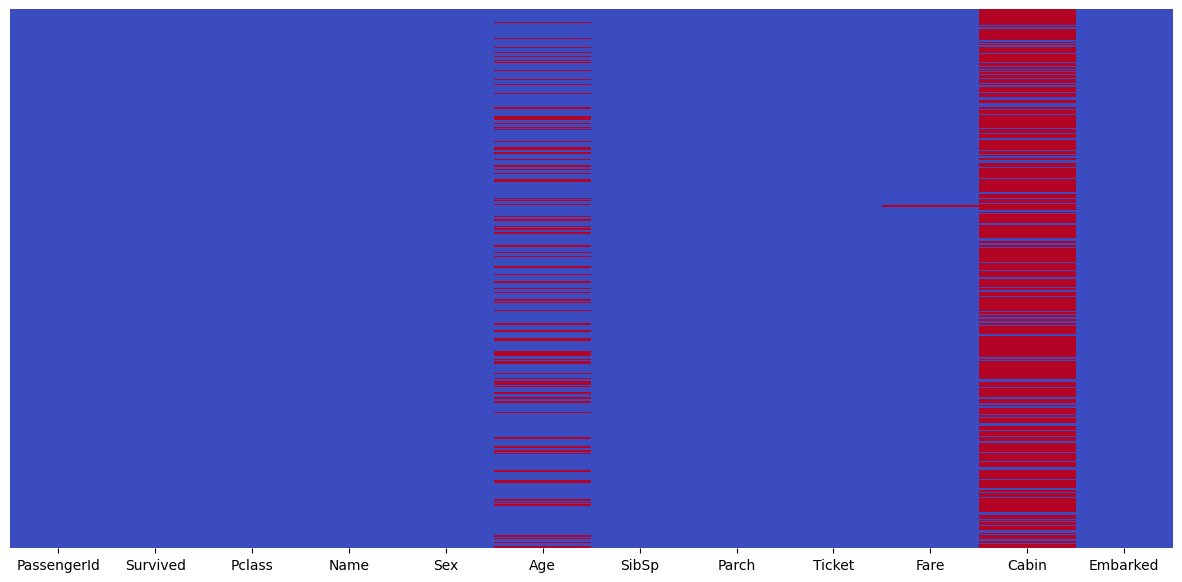

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

<ipython-input-6-05f4f38f7d96>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='RdBu_r')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Survived', ylabel='count'>

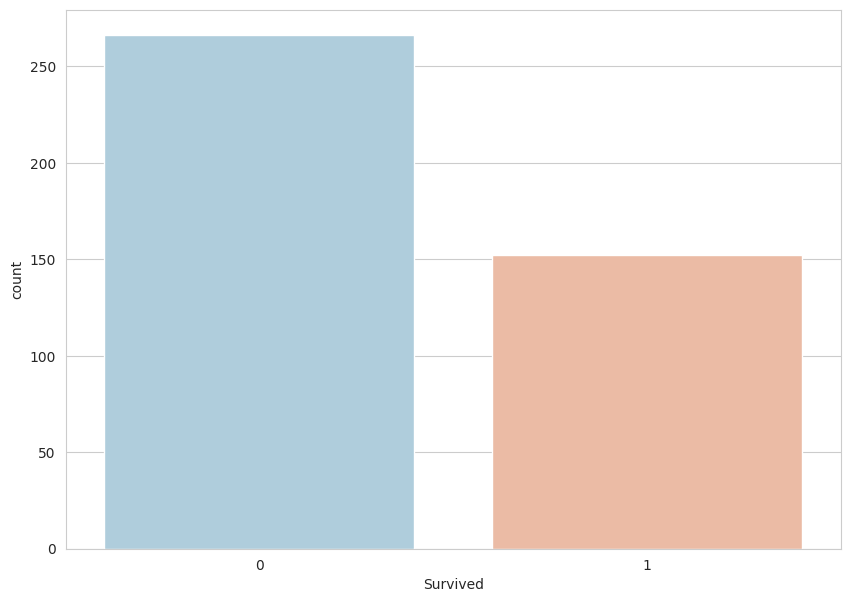

In [ ]:
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train = pd.concat([train,sex,embark],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.30,
                                                    random_state=101)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Example: Encoding categorical columns with dummy variables
train_encoded = pd.get_dummies(train, drop_first=True)

# Splitting the dataset again with the updated data
X_train, X_test, y_train, y_test = train_test_split(
    train_encoded.drop('Survived', axis=1),
    train_encoded['Survived'],
    test_size=0.30,
    random_state=101
)

# Train




In [ ]:
# Drop rows with any NaN values
train_cleaned = train_encoded.dropna()

# Splitting the dataset again
X_train, X_test, y_train, y_test = train_test_split(
    train_cleaned.drop('Survived', axis=1),
    train_cleaned['Survived'],
    test_size=0.30,
    random_state=101
)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[60  0]
 [ 0 40]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("\nF1 Score:", f1_score(y_test, y_pred))


F1 Score: 1.0


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
#SVM on same data set
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

# Initialize the SVM model
svm_model = SVC()

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Display confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:\n", conf_matrix_svm)

# Calculate F1 score
f1_svm = f1_score(y_test, y_pred_svm)
print("\nF1 Score:", f1_svm)

# Optional: Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.6

Confusion Matrix:
 [[60  0]
 [40  0]]

F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75        60
           1       0.00      0.00      0.00        40

    accuracy                           0.60       100
   macro avg       0.30      0.50      0.38       100
weighted avg       0.36      0.60      0.45       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Display confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:\n", conf_matrix_dt)

# Calculate F1 score
f1_dt = f1_score(y_test, y_pred_dt)
print("\nF1 Score:", f1_dt)

# Optional: Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 1.0

Confusion Matrix:
 [[60  0]
 [ 0 40]]

F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        40

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-26-03b2490892f1>:35: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test['Age'], X_test['Fare'], c=y_test, edgecolors='k', marker='x', label='Test')


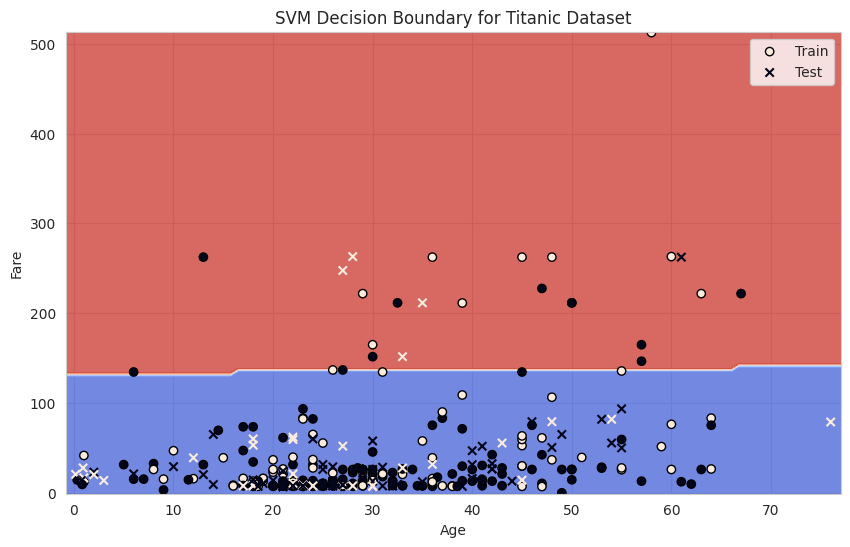

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load your Titanic dataset
# Ensure to preprocess and handle missing values as needed
# Example: replace 'train' with your actual DataFrame
X = train[['Age', 'Fare']].dropna()  # Replace with your chosen features
y = train['Survived'][X.index]  # Ensure that y matches the rows of X

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Create a mesh grid to plot the decision boundary
x_min, x_max = X['Age'].min() - 1, X['Age'].max() + 1
y_min, y_max = X['Fare'].min() - 1, X['Fare'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
plt.scatter(X_train['Age'], X_train['Fare'], c=y_train, edgecolors='k', marker='o', label='Train')
plt.scatter(X_test['Age'], X_test['Fare'], c=y_test, edgecolors='k', marker='x', label='Test')

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('SVM Decision Boundary for Titanic Dataset')
plt.legend()
plt.show()

